### Problem Statement :

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to 
another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has 
now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

### Goal :

* Build a model which will be used to predict whether a high-value customer will churn or not, in near future. By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
* It will also be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [3]:
# Importing dataset. Also the date fields have different format and hence make them the same.

telecomChurnInfo = pd.read_csv('telecom_churn_data.csv', encoding = 'ISO-8859-1', low_memory=False, 
                              parse_dates=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                                           'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 
                                           'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 
                                           'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], 
                               dayfirst=True)
telecomChurnInfo.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# # inspect telecomChurnInfo dataframe

print("*********************************  Info *******************************************") 
print(telecomChurnInfo.info())
print("*********************************  Shape ******************************************") 
print(telecomChurnInfo.shape)
print("**************************** Columns having null values *****************************")
print(telecomChurnInfo.isnull().any())
print("**************************** Describe *****************************")
telecomChurnInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB
None
*********************************  Shape ******************************************
(99999, 226)
**************************** Columns having null values *****************************
mobile_number           False
circle_id               False
loc_og_t2o_mou           True
std_og_t2o_mou           True
loc_ic_t2o_mou           True
last_date_of_month_6    False
last_date_of_month_7     True
last_date_of_month_8     True
last_date_of_month_9     True
arpu_6                  False
arpu_7                  False
arpu_8                  False
arpu_9                  False
onnet_mou_6              True
onnet_mou_7              True
onnet_mou_8              True
onnet_mou_9              True
offnet_mou_6     

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Step 2: Data Cleaning and Preparation

In [5]:
# Except for mobile number rest of the below columns have only single value. Hence dropping the columns

colsToBeRemoved = ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6',
                   'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 
                   'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
                   'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'] 

telecomChurnInfo = telecomChurnInfo.drop(colsToBeRemoved, axis = 1)

##### Derive new columns

In [6]:
# The min values of below columns are 1 and hence imputing the nulls in these columns with 0.

telecomChurnInfo['total_rech_data_6'] = telecomChurnInfo['total_rech_data_6'].replace(np.nan, 0)
telecomChurnInfo['total_rech_data_7'] = telecomChurnInfo['total_rech_data_7'].replace(np.nan, 0)
telecomChurnInfo['total_rech_data_8'] = telecomChurnInfo['total_rech_data_8'].replace(np.nan, 0)
telecomChurnInfo['total_rech_data_9'] = telecomChurnInfo['total_rech_data_9'].replace(np.nan, 0)

telecomChurnInfo['av_rech_amt_data_6'] = telecomChurnInfo['av_rech_amt_data_6'].replace(np.nan, 0)
telecomChurnInfo['av_rech_amt_data_7'] = telecomChurnInfo['av_rech_amt_data_7'].replace(np.nan, 0)
telecomChurnInfo['av_rech_amt_data_8'] = telecomChurnInfo['av_rech_amt_data_8'].replace(np.nan, 0)
telecomChurnInfo['av_rech_amt_data_9'] = telecomChurnInfo['av_rech_amt_data_9'].replace(np.nan, 0)

In [7]:
# Since the months of June and July are considered as good, we will calculate the total recharge amount for data of these 
# 2 months for further calculation of high value customers.
# This amount can be arrived at by multiplying the the total data recharged * average data recharge amount columns.

telecomChurnInfo['derived_tot_data_rech_6'] = telecomChurnInfo['total_rech_data_6'] * telecomChurnInfo['av_rech_amt_data_6']
telecomChurnInfo['derived_tot_data_rech_7'] = telecomChurnInfo['total_rech_data_7'] * telecomChurnInfo['av_rech_amt_data_7']

In [8]:
# Calculate the total recharge amount for june and july by adding the total recharge amount and the derived data recharge amount
# above

telecomChurnInfo['derived_tot_amt_rech_6'] = telecomChurnInfo['total_rech_amt_6'] + telecomChurnInfo['derived_tot_data_rech_6']
telecomChurnInfo['derived_tot_amt_rech_7'] = telecomChurnInfo['total_rech_amt_7'] + telecomChurnInfo['derived_tot_data_rech_7']

# Determine the average recharge amount for the month of june and july 

telecomChurnInfo['avg_rech_amt_6_7'] = (telecomChurnInfo['derived_tot_amt_rech_6'] 
                                        + telecomChurnInfo['derived_tot_amt_rech_7']) / 2

In [9]:
# Get the High value customer by filtering out those values that are less than the 70th percentile of the value in
# avg_rech_amt_6_7 column

amt_70th_percentile = telecomChurnInfo.avg_rech_amt_6_7.quantile(0.7) 
telecomChurnInfo = telecomChurnInfo[telecomChurnInfo['avg_rech_amt_6_7'] >= amt_70th_percentile]

In [10]:
# Create a new column called aon_mon to determine how many months the user has been with the netwrok

telecomChurnInfo['derived_aon_mon'] = telecomChurnInfo['aon']/30

# delete the aon column as we have already derived a new column from this

telecomChurnInfo = telecomChurnInfo.drop('aon', axis=1)
telecomChurnInfo.shape

(30001, 214)

##### Derive churn values

In [11]:
# Chrun will be calculate on the following fields for the month of september.
# If the user has not made any incoming , outgoing calls or used any 2g or 3g data during the month, it means the user has 
# churned (1) else the user has not churned (0)

def isChurn(dataFrame):
    if ( (dataFrame['total_ic_mou_9'] == 0 ) and (dataFrame['total_og_mou_9'] == 0) 
        and (dataFrame['vol_2g_mb_9'] == 0) and (dataFrame['vol_3g_mb_9'] == 0) ) :
        
        return 1
    else:
        return 0
    
telecomChurnInfo['churn'] = telecomChurnInfo.apply(isChurn, axis=1)
telecomChurnInfo.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,derived_tot_data_rech_6,derived_tot_data_rech_7,derived_tot_amt_rech_6,derived_tot_amt_rech_7,avg_rech_amt_6_7,derived_aon_mon,churn
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,32.266667,1
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,...,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,26.733333,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,10.500000,0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,24.000000,0
23,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,...,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,20.133333,0


In [12]:
# Removing the september month columns as we would be predicting churn for that month

drop_sept_cols = [x for x in telecomChurnInfo.columns if '_9' in x]
print('September month cols to be dropped : ',drop_sept_cols)

telecomChurnInfo = telecomChurnInfo.drop(drop_sept_cols, axis=1)

September month cols to be dropped :  ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [13]:
# Removing the date columns as we will not be using them for any further calculations

dateColsToBeRemoved = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                       'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'] 

telecomChurnInfo = telecomChurnInfo.drop(dateColsToBeRemoved, axis = 1)
telecomChurnInfo.shape

(30001, 158)

In [14]:
# Let us now check if there are any columns that have more than 70% null values. If yes, then we can delete those rows

perc_missing = telecomChurnInfo.isna().sum() * 100 / len(telecomChurnInfo)
perc_missing = pd.DataFrame(perc_missing, columns=['percentage'])
perc_missing.loc[perc_missing['percentage'] >= 70.0]

,percentage


Since there are no columns having more than 70% null values, we will not be dropping any columns

##### Imputing the null values 

In [15]:
# We will impute the null values in all columns with 0 as imputing with mean or median will not make sense as each users usage 
# will be different

telecomChurnInfo = telecomChurnInfo.fillna(value=0)

In [16]:
# Since the june and july month are considered as good period for analysis, we will take the average of columns of these 2 months
# and use that for further analysis

columnToBeMergedList = telecomChurnInfo.filter(regex='_6|_7').columns.str[:-2]
columnToBeMergedList = list(columnToBeMergedList.unique())
columnToBeMergedList.remove('avg_rech_amt_6')

print('Columns to be Merged : ',columnToBeMergedList)

for idx, col in enumerate(columnToBeMergedList):
    avg_col_name = "avg_"+col+"_6_7"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecomChurnInfo[avg_col_name] = (telecomChurnInfo[col_6]  + telecomChurnInfo[col_7])/ 2

Columns to be Merged :  ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user', 'derived_tot_data_rech', 'derived_tot_amt_rech']


In [17]:
for idx, col in enumerate(columnToBeMergedList):    
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecomChurnInfo = telecomChurnInfo.drop([col_6,col_7], axis=1)
    
print('Telecom Churn Data Frame Shape : ', telecomChurnInfo.shape)

Telecom Churn Data Frame Shape :  (30001, 107)


##### Remove highly correlated attributes 

In [18]:
# Determine the columns that has a correlation of more than 80% and remove them

correlation = telecomChurnInfo.corr()
correlation.loc[:,:] = np.tril(correlation, k=-1)
correlation = correlation.stack()
correlation = pd.DataFrame(correlation[(correlation > 0.80) | (correlation < -0.80)].sort_values(), columns=['colname'])
correlation
#correlation.to_clipboard(excel=True, sep='|')

,,colname
avg_arpu_2g_6_7,avg_vol_3g_mb_6_7,0.801332
av_rech_amt_data_8,max_rech_data_8,0.801613
avg_total_ic_mou_6_7,total_ic_mou_8,0.806188
avg_arpu_3g_6_7,avg_vol_3g_mb_6_7,0.806628
avg_vol_3g_mb_6_7,avg_av_rech_amt_data_6_7,0.807747
avg_loc_og_t2t_mou_6_7,loc_og_t2t_mou_8,0.811197
arpu_3g_8,av_rech_amt_data_8,0.813000
avg_std_ic_mou_6_7,avg_std_ic_t2m_mou_6_7,0.817631
avg_av_rech_amt_data_6_7,avg_max_rech_data_6_7,0.818277
avg_loc_ic_mou_6_7,loc_ic_mou_8,0.824149


In [19]:
# Drop the highly correlated columns from above 

correlated_columns = ['avg_arpu_2g_6_7', 'av_rech_amt_data_8', 'avg_total_ic_mou_6_7', 'avg_arpu_3g_6_7', 'avg_vol_3g_mb_6_7',
            'avg_loc_og_t2t_mou_6_7', 'arpu_3g_8', 'avg_std_ic_mou_6_7', 'avg_av_rech_amt_data_6_7', 'avg_loc_ic_mou_6_7',
            'avg_loc_og_mou_6_7', 'avg_total_og_mou_6_7', 'arpu_2g_8', 'monthly_3g_8', 'avg_std_og_t2m_mou_6_7', 'std_ic_mou_8',
            'loc_ic_mou_8', 'avg_monthly_3g_6_7', 'std_og_t2m_mou_8', 'total_og_mou_8', 'avg_std_og_t2t_mou_6_7', 
            'avg_sachet_3g_6_7', 'std_og_t2t_mou_8', 'sachet_3g_8', 'total_ic_mou_8', 'sachet_2g_8', 'avg_sachet_2g_6_7',
            'count_rech_2g_8', 'avg_count_rech_2g_6_7', 'avg_derived_tot_amt_rech_6_7', 'avg_derived_tot_data_rech_6_7',
            'avg_isd_og_mou_6_7', 'total_rech_amt_8', 'avg_total_rech_amt_6_7']

telecomChurnInfo = telecomChurnInfo.drop(correlated_columns, axis = 1)
telecomChurnInfo.shape

(30001, 73)

##### Outlier Treatment

In [20]:
# For better viewing of the outlier information in the excel sheet, used command to copy the data into excel

telecomChurnInfo.describe(percentiles=[0.25,0.5,0.75,0.95,0.99]).to_clipboard(excel=True, index=True, sep='|')

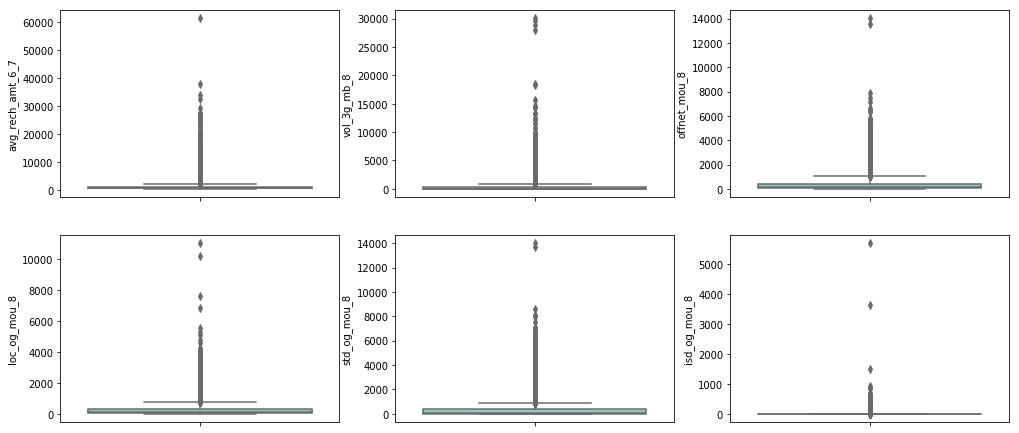

In [21]:
# Let us view the following attributes in the box plot to check on the outliers in these attributes

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'avg_rech_amt_6_7', palette='Set3', data = telecomChurnInfo)
plt.subplot(5,3,2)
sns.boxplot(y = 'vol_3g_mb_8', palette='Set3', data = telecomChurnInfo)
plt.subplot(5,3,3)
sns.boxplot(y = 'offnet_mou_8', palette='Set3', data = telecomChurnInfo)
plt.subplot(5,3,4)
sns.boxplot(y = 'loc_og_mou_8', palette='Set3', data = telecomChurnInfo)
plt.subplot(5,3,5)
sns.boxplot(y = 'std_og_mou_8', palette='Set3', data = telecomChurnInfo)
plt.subplot(5,3,6)
sns.boxplot(y = 'isd_og_mou_8', palette='Set3', data = telecomChurnInfo)
plt.show()

In [22]:
# Let us cap the outliers from the above columns first 

# Capping outliers from 'avg_rech_amt_6_7'

max_val_avg_rech_amt = telecomChurnInfo['avg_rech_amt_6_7'].mean() + 3*telecomChurnInfo['avg_rech_amt_6_7'].std()
min_val_avg_rech_amt = telecomChurnInfo['avg_rech_amt_6_7'].mean() - 3*telecomChurnInfo['avg_rech_amt_6_7'].std()
telecomChurnInfo = telecomChurnInfo[(telecomChurnInfo['avg_rech_amt_6_7'] <= max_val_avg_rech_amt) 
                                    & (telecomChurnInfo['avg_rech_amt_6_7'] >= min_val_avg_rech_amt) ]

# Capping outliers from 'vol_3g_mb_8'

max_val_vol_3g_mb = telecomChurnInfo['vol_3g_mb_8'].mean() + 3*telecomChurnInfo['vol_3g_mb_8'].std()
min_val_vol_3g_mb = telecomChurnInfo['vol_3g_mb_8'].mean() - 3*telecomChurnInfo['vol_3g_mb_8'].std()
telecomChurnInfo = telecomChurnInfo[(telecomChurnInfo['vol_3g_mb_8'] <= max_val_vol_3g_mb) 
                                    & (telecomChurnInfo['vol_3g_mb_8'] >= min_val_vol_3g_mb) ]

# Capping outliers from 'offnet_mou_8'

max_val_offnet_mou = telecomChurnInfo['offnet_mou_8'].mean() + 3*telecomChurnInfo['offnet_mou_8'].std()
min_val_offnet_mou = telecomChurnInfo['offnet_mou_8'].mean() - 3*telecomChurnInfo['offnet_mou_8'].std()
telecomChurnInfo = telecomChurnInfo[(telecomChurnInfo['offnet_mou_8'] <= max_val_offnet_mou) 
                                    & (telecomChurnInfo['offnet_mou_8'] >= min_val_offnet_mou) ]

# Capping outliers from 'loc_og_mou_8'

max_val_loc_og_mou = telecomChurnInfo['loc_og_mou_8'].mean() + 3*telecomChurnInfo['loc_og_mou_8'].std()
min_val_loc_og_mou = telecomChurnInfo['loc_og_mou_8'].mean() - 3*telecomChurnInfo['loc_og_mou_8'].std()
telecomChurnInfo = telecomChurnInfo[(telecomChurnInfo['loc_og_mou_8'] <= max_val_loc_og_mou) 
                          & (telecomChurnInfo['loc_og_mou_8'] >= min_val_loc_og_mou) ]

# Capping outliers from 'std_og_mou_8'

max_val_std_og_mou = telecomChurnInfo['std_og_mou_8'].mean() + 3*telecomChurnInfo['std_og_mou_8'].std()
min_val_std_og_mou = telecomChurnInfo['std_og_mou_8'].mean() - 3*telecomChurnInfo['std_og_mou_8'].std()
telecomChurnInfo = telecomChurnInfo[(telecomChurnInfo['std_og_mou_8'] <= max_val_std_og_mou) 
                          & (telecomChurnInfo['std_og_mou_8'] >= min_val_std_og_mou) ]

# Capping outliers from 'isd_og_mou_8'

max_val_isd_og_mou = telecomChurnInfo['isd_og_mou_8'].mean() + 3*telecomChurnInfo['isd_og_mou_8'].std()
min_val_isd_og_mou = telecomChurnInfo['isd_og_mou_8'].mean() - 3*telecomChurnInfo['isd_og_mou_8'].std()
telecomChurnInfo = telecomChurnInfo[(telecomChurnInfo['isd_og_mou_8'] <= max_val_isd_og_mou) 
                          & (telecomChurnInfo['isd_og_mou_8'] >= min_val_isd_og_mou) ]

telecomChurnInfo.shape

(27217, 73)

In [23]:
# Data retained after removing outliers

retained_data = round(100*(len(telecomChurnInfo)/30001),2)
print("Total data retained after removing outliers : ",retained_data,'%')

Total data retained after removing outliers :  90.72 %


In [24]:
# Check if any columns have more than 80% correlation  :

cor = telecomChurnInfo.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor = pd.DataFrame(cor[(cor > 0.80) | (cor < -0.80)].sort_values(), columns=['colname'])
cor

,,colname
loc_og_mou_8,loc_og_t2m_mou_8,0.901716


In [25]:
# After capping the outliers in 'loc_og_mou_8', this column seems to be highly correlated with 'loc_og_t2m_mou_8'. 
# Hence dropping the column 

telecomChurnInfo = telecomChurnInfo.drop(['loc_og_mou_8'], axis=1)

In [26]:
# print the dataframe shape

print('Telecom Churn DataFrame Shape : ',telecomChurnInfo.shape)

# Make a copy of the dataframe, before visualizing the data :

telecomChurnInfo_duplicate = telecomChurnInfo.copy()
print('Telecom Churn Duplicate DataFrame Shape : ',telecomChurnInfo.shape)

Telecom Churn DataFrame Shape :  (27217, 72)
Telecom Churn Duplicate DataFrame Shape :  (27217, 72)


## Step 3: Data Analysis

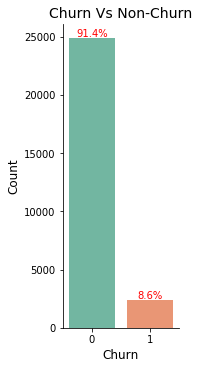

In [27]:
# View the churn and non churn data

plot = sns.catplot(x="churn", kind="count", data=telecomChurnInfo, palette="Set2", aspect= .5);

plt.title('Churn Vs Non-Churn', fontsize = 14)
plt.xlabel("Churn", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(telecomChurnInfo))), 
                (p.get_x() + p.get_width()/2., p.get_height()), color='red', ha='center', va='bottom')

plt.show()

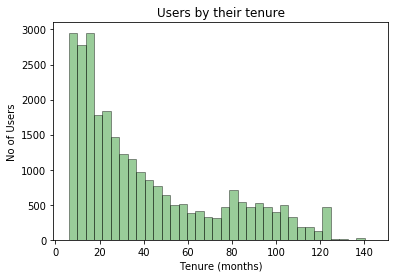

In [28]:
# View the users by their tenure

ax = sns.distplot(telecomChurnInfo['derived_aon_mon'], hist=True, kde=False, bins=36, color = 'green', hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth': 4})
ax.set_ylabel('No of Users')
ax.set_xlabel('Tenure (months)')
ax.set_title('Users by their tenure')
plt.show()

Per the above image, it can be noted that there are large number of users with less than 5 year tenure.

In [29]:
# Create a categorical column called tenure range

tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecomChurnInfo['tenure_range'] = pd.cut(telecomChurnInfo['derived_aon_mon'], tenure_range, labels=tenure_label)
telecomChurnInfo['tenure_range'].value_counts()

2-5 Yrs            8669
1-2 Yrs            7127
6-12 Months        4624
5 Yrs and above     127
0-6 Months           14
Name: tenure_range, dtype: int64

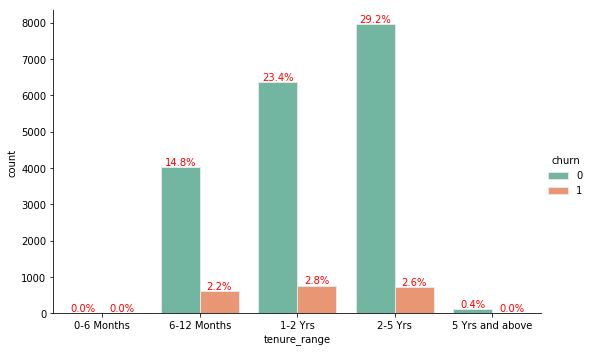

In [30]:
# Tenure Range Vs Churn/Non-Churn

plot = sns.catplot(x="tenure_range", hue="churn", kind="count", palette="Set2", edgecolor=".9", aspect = 1.5, 
                   data=telecomChurnInfo)

# print the count

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(telecomChurnInfo))), 
                (p.get_x() + p.get_width()/2., p.get_height()), color='red', ha='center', va='bottom')
    
plt.show()

As per the above image, it can be noted that major churn happens for users between 1 to 2 years

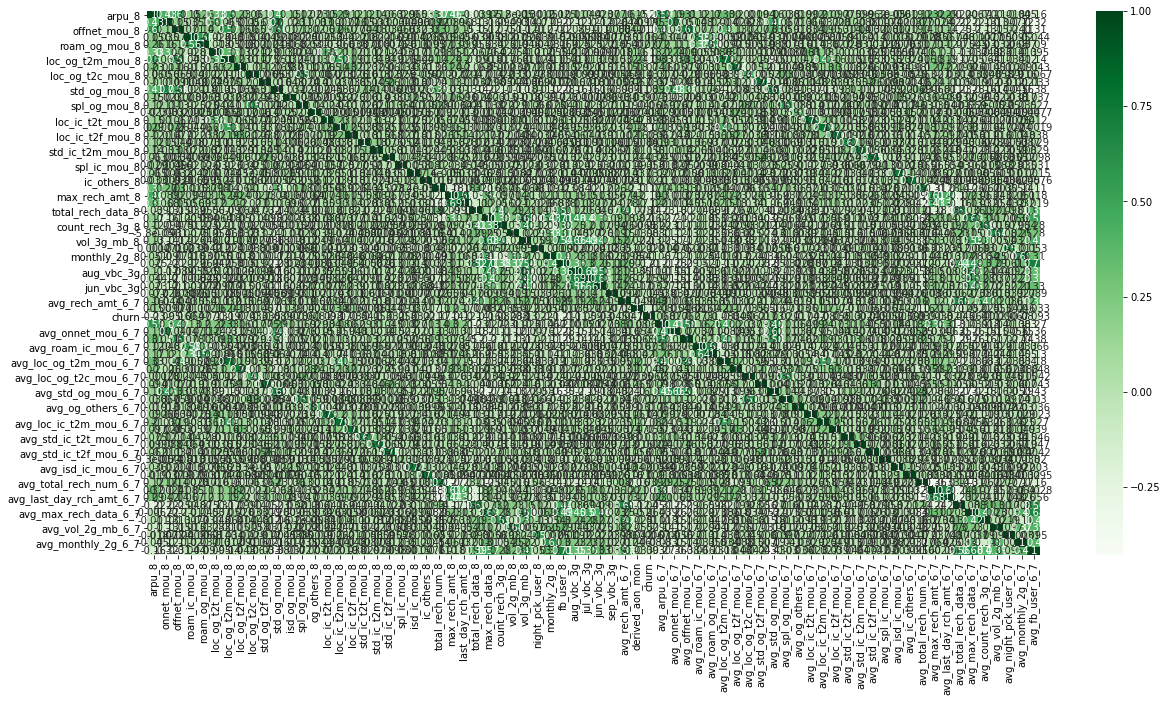

In [31]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(telecomChurnInfo.corr(), annot = True, cmap="Greens")
plt.show()

Since there are many attributes, it is very difficult to find the correlation among variables with the above heatmap.

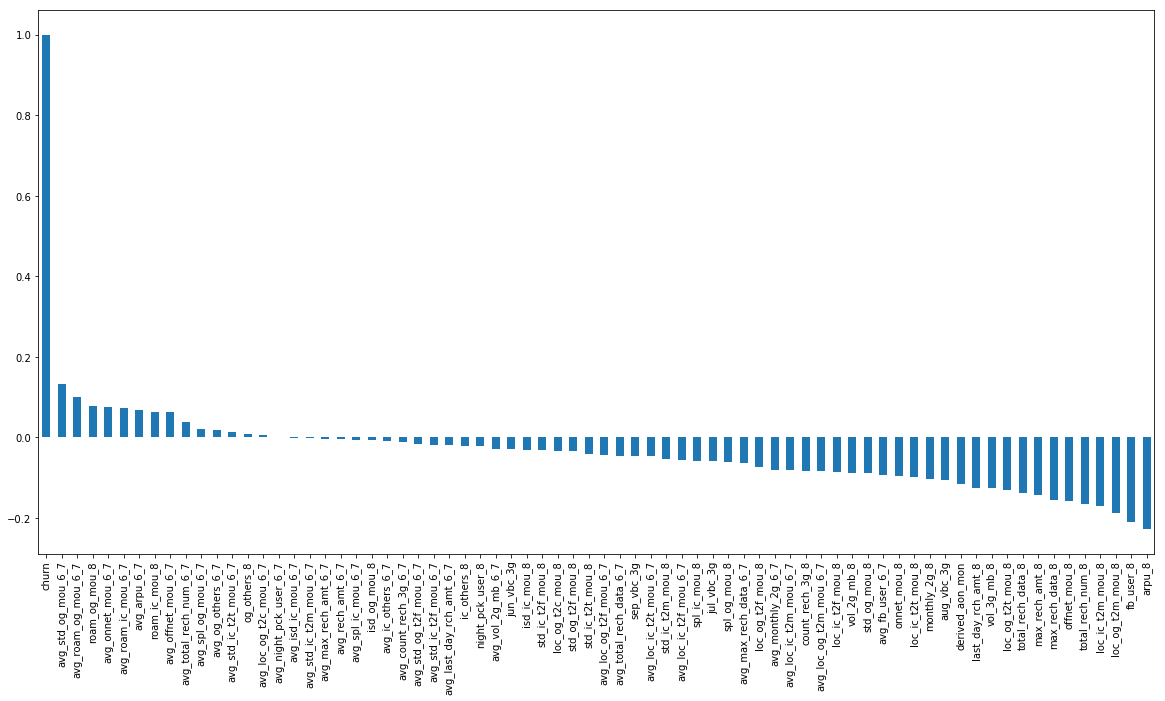

In [32]:
# View the relation of churn with other variables 

plt.figure(figsize=(20,10))
telecomChurnInfo.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

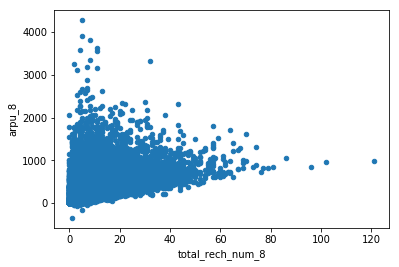

In [33]:
# View the Total Recharge Vs Average Revenue per user for the month of August

telecomChurnInfo[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

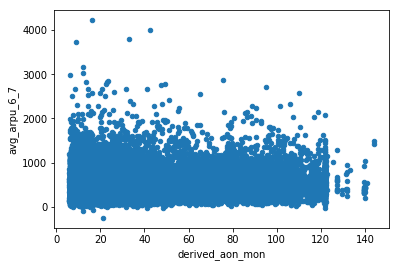

In [34]:
# View the Users tenure Vs Average Revenue per user for the month of June and July

telecomChurnInfo[['derived_aon_mon', 'avg_arpu_6_7']].plot.scatter(x = 'derived_aon_mon', y='avg_arpu_6_7')
plt.show()

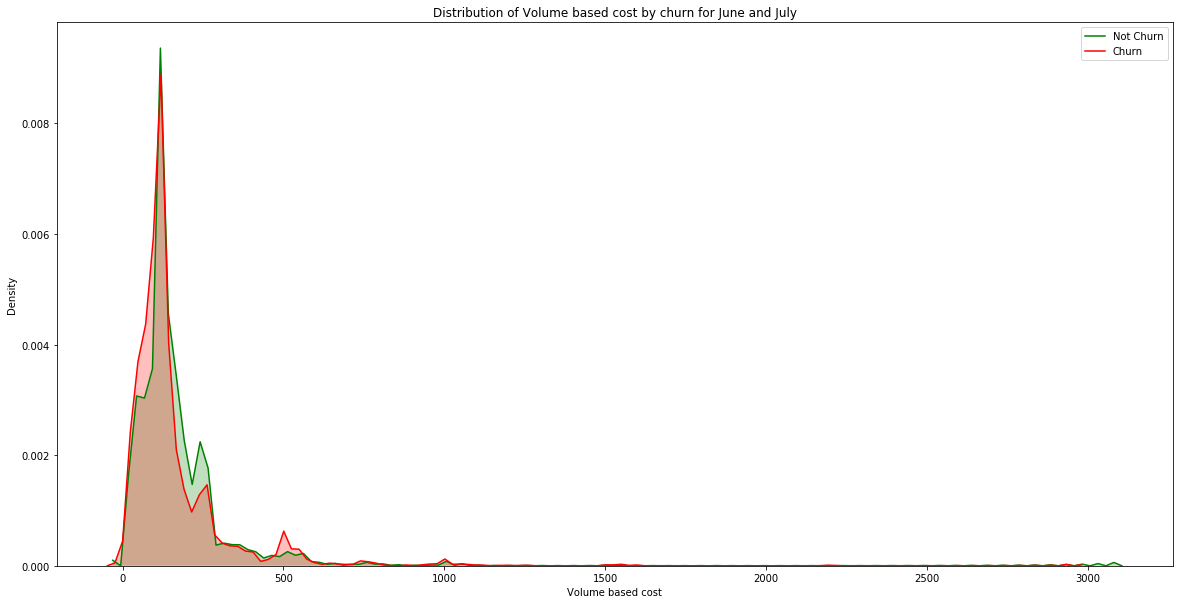

In [35]:
# View churn Vs Max recharge amount for the month of June and July

plt.figure(figsize=(20,10))

ax = sns.kdeplot(telecomChurnInfo.avg_max_rech_amt_6_7[(telecomChurnInfo["churn"] == 0)], color="green", shade = True)
ax = sns.kdeplot(telecomChurnInfo.avg_max_rech_amt_6_7[(telecomChurnInfo["churn"] == 1)], ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn for June and July')
plt.show()

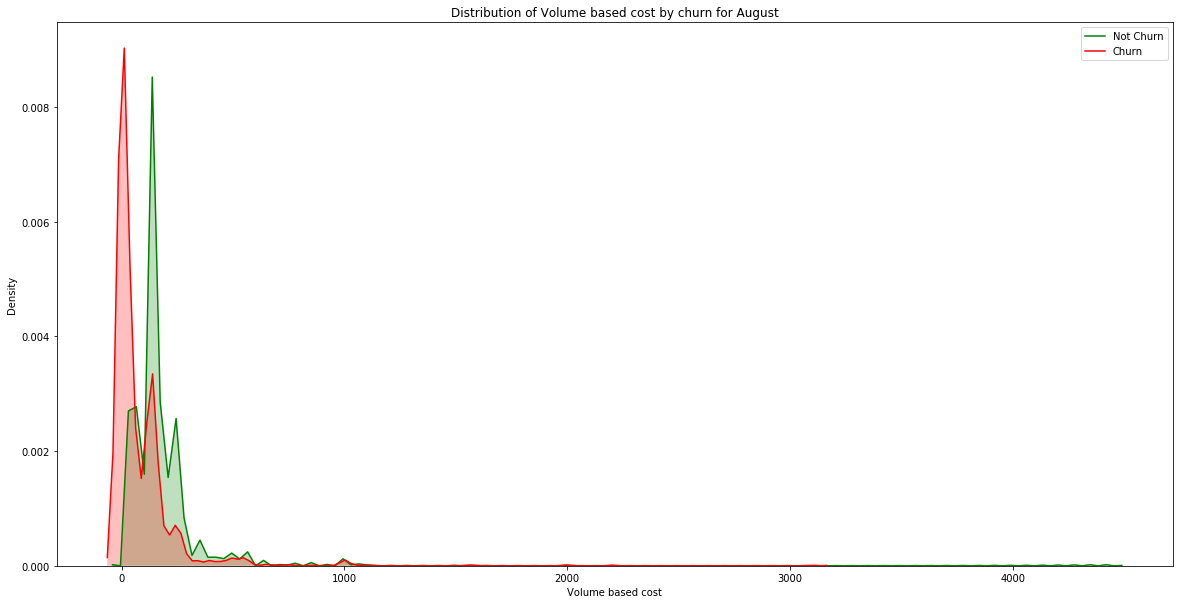

In [36]:
# View churn Vs Max recharge amount for the month of August

plt.figure(figsize=(20,10))
ax = sns.kdeplot(telecomChurnInfo.max_rech_amt_8[(telecomChurnInfo["churn"] == 0)], color="green", shade = True)
ax = sns.kdeplot(telecomChurnInfo.max_rech_amt_8[(telecomChurnInfo["churn"] == 1)], ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn for August')
plt.show()

In [37]:
# Since we will not be using the tenure_range column any more for further calculations, we will drop the column

telecomChurnInfo = telecomChurnInfo.drop('tenure_range', axis = 1)

## Step 4: Model Building

In [38]:
# Split the features into independent and dependent variables.

X = telecomChurnInfo.drop(['churn'], axis=1)
y = telecomChurnInfo['churn']

telecomChurnInfo.drop('churn', axis=1, inplace=True)

##### Split the data into train and test data sets

In [39]:
# Split in train & Test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

##### Scale the training data

In [40]:
# Scaling the data using min max scalar

col = X_train.columns

scaler = MinMaxScaler()
X_train[col] = scaler.fit_transform(X_train[col])

# print the shape of X_train and X_test data

print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

X_train Shape :  (19051, 71)
X_test Shape :  (8166, 71)


In [41]:
# Let us check for the class imbalance in the data

y_train_imbalance = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imbalance = (y_test != 0).sum()/(y_test == 0).sum()

print("Imbalance in Train Data : ", y_train_imbalance)
print("Imbalance in Test Data : ", y_test_imbalance)

Imbalance in Train Data :  0.09494798551640898
Imbalance in Test Data :  0.09331905208193868


##### Applying SMOTE for handling class imbalance

In [42]:
# Apply SMOTE on train dataset to handle class imbalance in the dataset

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

print("X_tr Shape", X_tr.shape)
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

X_tr Shape (34798, 71)
y_tr Shape (34798,)
Imbalance in Train Data :  1.0


In [43]:
# Write the X_tr and Y_tr to dataframe for further usage

X_train_SMOTE = pd.DataFrame(X_tr, columns=X_train.columns)
y_train_SMOTE = pd.DataFrame(y_tr, columns=['churn'])

display(X_train_SMOTE.head())
display(y_train_SMOTE.head())

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,...,avg_total_rech_num_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_total_rech_data_6_7,avg_max_rech_data_6_7,avg_count_rech_3g_6_7,avg_vol_2g_mb_6_7,avg_night_pck_user_6_7,avg_monthly_2g_6_7,avg_fb_user_6_7
0,0.146246,0.019558,0.119845,0.000000,0.000000,0.064910,0.153695,0.002089,0.002986,0.0,...,0.069672,0.039024,0.000000,0.170213,0.014791,0.0,0.000000,0.0,0.000000,0.0
1,0.197881,0.006360,0.099297,0.040948,0.030839,0.000821,0.014963,0.001809,0.000000,0.0,...,0.069672,0.064390,0.052506,0.085106,0.127331,0.0,0.706447,0.0,0.444444,1.0
2,0.143281,0.004262,0.338098,0.000293,0.000437,0.008213,0.053431,0.000000,0.000000,0.0,...,0.258197,0.023740,0.018752,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.087691,0.003538,0.029860,0.000000,0.000000,0.012659,0.024629,0.000000,0.072352,0.0,...,0.057377,0.050081,0.005114,0.063830,0.099035,0.0,0.003111,0.0,0.333333,1.0
4,0.177117,0.188517,0.131640,0.000000,0.000000,0.010364,0.095110,0.000000,0.000000,0.0,...,0.168033,0.039024,0.027276,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


,churn
0,0
1,0
2,1
3,0
4,0


### a) Logistic Regression with PCA

In [44]:
pca = PCA(random_state=42)

# Apply PCA on training data

pca.fit(X_train_SMOTE)
X_train_SMOTE_pca = pca.fit_transform(X_train_SMOTE)

print('Shape after applying PCA : ', X_train_SMOTE_pca.shape)

Shape after applying PCA :  (34798, 71)


In [45]:
# Let's check the first 3 Principle Components and write it to a dataframe :

feature_col = list(telecomChurnInfo.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':feature_col})
pca_df.head()

,PC1,PC2,PC3,Feature
0,0.009008,0.149912,0.147893,arpu_8
1,-0.018173,0.069326,0.042793,onnet_mou_8
2,-0.038217,0.266700,0.345270,offnet_mou_8
3,-0.002951,0.006006,0.003210,roam_ic_mou_8
4,-0.004002,0.006972,0.004491,roam_og_mou_8


In [46]:
# Principal Components capture maximum variance and are ordered
# Hence let us how many components help in determining appxly 95% variance

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 50.34,  63.68,  70.76,  77.64,  80.86,  83.61,  86.13,  87.87,
        89.18,  90.31,  91.31,  92.12,  92.77,  93.35,  93.9 ,  94.42,
        94.92,  95.41,  95.74,  96.05,  96.34,  96.6 ,  96.84,  97.07,
        97.26,  97.45,  97.61,  97.76,  97.91,  98.06,  98.2 ,  98.33,
        98.46,  98.58,  98.7 ,  98.81,  98.91,  99.01,  99.1 ,  99.18,
        99.25,  99.32,  99.39,  99.45,  99.5 ,  99.55,  99.6 ,  99.64,
        99.67,  99.7 ,  99.73,  99.76,  99.79,  99.82,  99.85,  99.87,
        99.89,  99.91,  99.93,  99.95,  99.97,  99.98,  99.99, 100.  ,
       100.01, 100.02, 100.03, 100.04, 100.04, 100.04, 100.04])

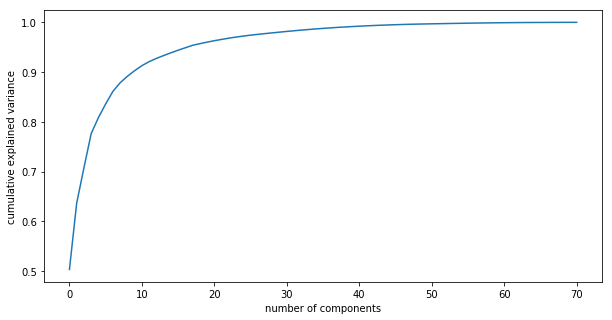

In [47]:
# Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Based on the screeplot above, an approximate of 18 components can be used to define 95% variance. Hence we will go ahead with 18 components

In [48]:
# Basis transformation - getting the data onto our principle components

pca_18 = PCA(n_components=18)

df_train_pca_18 = pca_18.fit_transform(X_train_SMOTE)
print('Shape of the train data set with 18 PCA Components : ',df_train_pca_18.shape)

Shape of the train data set with 18 PCA Components :  (34798, 18)


In [49]:
# Build the logistic regression model on the train data set using the 18 attributes after pca

lr_pca_18 = LogisticRegression()
lr_pca_18.fit(df_train_pca_18, y_tr)

# Predicted probabilities for train set

y_pred18_train = lr_pca_18.predict(df_train_pca_18)

In [50]:
# print the confusion matrix and accuracy on the training data set :

lr_tr_confusion = confusion_matrix(y_tr,y_pred18_train)
print('Confusion Matrix : ', '\n')
print(lr_tr_confusion)
print('\n Logistic Regression accuracy score with PCA : ', accuracy_score(y_tr, y_pred18_train))

Confusion Matrix :  

[[14296  3103]
 [ 2851 14548]]

 Logistic Regression accuracy score with PCA :  0.8288982125409506


In [51]:
# Let us now check the Sensitivity, Specificity, False Positive Rate and Positive Predictive Value and Negative Predictive Values

# true positive
TP = lr_tr_confusion[1,1]

# true negatives
TN = lr_tr_confusion[0,0] 

# false positives
FP = lr_tr_confusion[0,1] 

# false negatives
FN = lr_tr_confusion[1,0] 

print('Sensitivity : ',TP / float(TP+FN))
print('Specificity : ',TN / float(TN+FP))
print('False Positive Rate : ', FP/ float(TN+FP)) # predicting churn when user has not churned
print ('Positive Predictive Value : ', TP / float(TP+FP))
print ('Negative Predictive Value : ',TN / float(TN+FN))

Sensitivity :  0.8361400080464394
Specificity :  0.8216564170354618
False Positive Rate :  0.1783435829645382
Positive Predictive Value :  0.8242025947538383
Negative Predictive Value :  0.8337318481367003


In [52]:
# class-wise accuracy

class_wise = metrics.classification_report(y_true=y_tr, y_pred=y_pred18_train)
print(class_wise)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     17399
           1       0.82      0.84      0.83     17399

    accuracy                           0.83     34798
   macro avg       0.83      0.83      0.83     34798
weighted avg       0.83      0.83      0.83     34798



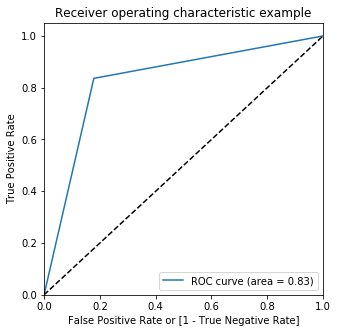

In [53]:
# Let us draw the ROC curve and fins the AUC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve(y_tr, y_pred18_train, drop_intermediate = False )
draw_roc(y_tr, y_pred18_train)

Per the above diagram, we can see that the AUC is 83% on the training dataset

In [54]:
# Now let us scale and predict on the test data set.

# Scale the test data set.

col = X_test.columns
X_test[col] = scaler.transform(X_test[col])

df_test_pca_18 = pca_18.transform(X_test)
print('Shape of the test data set with 18 PCA Components : ',df_test_pca_18.shape)

# Predicted probabilities for test data set

y_pred18_test = lr_pca_18.predict(df_test_pca_18)

Shape of the test data set with 18 PCA Components :  (8166, 18)


In [55]:
# print the confusion matrix and accuracy on the test data set :

lr_confusion = confusion_matrix(y_test,y_pred18_test)
print('Confusion Matrix : ', '\n')
print(lr_confusion)
print('\n Logistic Regression accuracy score with PCA on Test Data : ', accuracy_score(y_test, y_pred18_test))

Confusion Matrix :  

[[6191 1278]
 [ 144  553]]

 Logistic Regression accuracy score with PCA on Test Data :  0.8258633357825128


In [56]:
# Let us now check the Sensitivity, Specificity, False Positive Rate, Positive Predictive Value and Negative Predictive Values

# true positive
TP = lr_confusion[1,1]

# true negatives
TN = lr_confusion[0,0] 

# false positives
FP = lr_confusion[0,1] 

# false negatives
FN = lr_confusion[1,0] 

print('Sensitivity : ',TP / float(TP+FN))
print('Specificity : ',TN / float(TN+FP))
print('False Positive Rate : ', FP/ float(TN+FP)) # predicting churn when user has not churned
print ('Positive Predictive Value : ', TP / float(TP+FP))
print ('Negative Predictive Value : ',TN / float(TN+FN))

Sensitivity :  0.793400286944046
Specificity :  0.8288927567278083
False Positive Rate :  0.17110724327219173
Positive Predictive Value :  0.3020207536865101
Negative Predictive Value :  0.9772691397000789


In [57]:
# class-wise accuracy - on test data

class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred18_test)
print(class_wise)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7469
           1       0.30      0.79      0.44       697

    accuracy                           0.83      8166
   macro avg       0.64      0.81      0.67      8166
weighted avg       0.92      0.83      0.86      8166



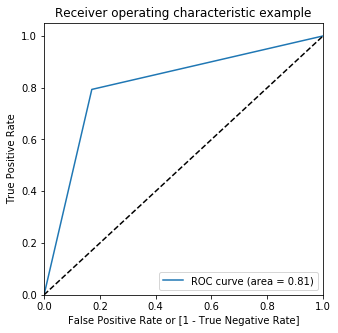

In [58]:
# Let us draw the ROC curve and find the AUC on test dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred18_test, drop_intermediate = False )
draw_roc(y_test, y_pred18_test)

Per the above diagram, we can see that the AUC is 81% on the test dataset

###### Coefficients and Intercepts of the variables :

In [59]:
# Coefficients :

print('coefficients : ',lr_pca_18.coef_)
      
# Intercept : 

print('\n Intercept : ',lr_pca_18.intercept_)

coefficients :  [[-1.82725028 -4.28925115 -4.65702469 -1.06618254 -3.78448983  2.4782617
   1.56701512 -1.7769683  -5.23317044  7.82724225 -2.76339266 -6.35911499
  -2.73509148 -1.39401945 -6.48634117 -0.58012973  0.51460674 -2.45627796]]

 Intercept :  [-0.22668207]


###### Observations on Logistic Regression with PCA :

    - Model has 83% Accuracy.
    - Model Sensitivity is 79%.
    - AUC is around 81%
    - 18 principle components can obtain an optimal accuracy with a variance of around 95%.    

### b) Random Forest

###### Split the data into train and test data sets
   - We do not need to do any sclaing in case of Random Forest

In [60]:
# Split in train & Test

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

##### Applying SMOTE to handle class imbalance

In [61]:
# Apply SMOTE on train dataset to handle class imbalance in the dataset

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

print('X_tr Shape', X_tr.shape)
print('y_tr Shape', y_tr.shape)

# Write the X_tr and Y_tr to dataframe for further usage

X_train_SMOTE = pd.DataFrame(X_tr, columns=X_train.columns)
y_train_SMOTE = pd.DataFrame(y_tr, columns=['churn'])

display(X_train_SMOTE.head())
display(y_train_SMOTE.head())

X_tr Shape (34798, 71)
y_tr Shape (34798,)


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,...,avg_total_rech_num_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_total_rech_data_6_7,avg_max_rech_data_6_7,avg_count_rech_3g_6_7,avg_vol_2g_mb_6_7,avg_night_pck_user_6_7,avg_monthly_2g_6_7,avg_fb_user_6_7
0,446.660,87.83,212.88,0.00,0.00,81.48,191.46,1.94,0.61,0.0,...,9.0,120.0,0.0,4.0,23.0,0.0,0.000,0.0,0.0,0.0
1,656.215,28.56,176.38,118.68,164.59,1.03,18.64,1.68,0.00,0.0,...,9.0,198.0,154.0,2.0,198.0,0.0,3418.810,0.0,2.0,1.0
2,434.626,19.14,600.56,0.85,2.33,10.31,66.56,0.00,0.00,0.0,...,32.0,73.0,55.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3,209.024,15.89,53.04,0.00,0.00,15.89,30.68,0.00,14.78,0.0,...,7.5,154.0,15.0,1.5,154.0,0.0,15.055,0.0,1.5,1.0
4,571.945,846.59,233.83,0.00,0.00,13.01,118.48,0.00,0.00,0.0,...,21.0,120.0,80.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


,churn
0,0
1,0
2,1
3,0
4,0


##### Default Hyperparameters

In [62]:
# Make predictions

default_model_rf = RandomForestClassifier()
default_model_rf.fit(X_train_SMOTE, y_train_SMOTE['churn'].values)

rf_prediction_test = default_model_rf.predict(X_test)

In [63]:
# print the confusion matrix and accuracy on the test data set :

rf_default_confusion = confusion_matrix(y_test, rf_prediction_test)
print('Confusion Matrix : ', '\n')
print(rf_default_confusion)
print('\n Random Forest (Default Parameters) accuracy score on Test Data : ', metrics.accuracy_score(y_test, rf_prediction_test))

Confusion Matrix :  

[[7152  317]
 [ 281  416]]

 Random Forest (Default Parameters) accuracy score on Test Data :  0.9267695322067108


In [64]:
# Let us now check the Sensitivity, Specificity, False Positive Rate, Positive Predictive Value and Negative Predictive Values

# true positive
TP = rf_default_confusion[1,1]

# true negatives
TN = rf_default_confusion[0,0] 

# false positives
FP = rf_default_confusion[0,1] 

# false negatives
FN = rf_default_confusion[1,0] 

print('Sensitivity : ',TP / float(TP+FN))
print('Specificity : ',TN / float(TN+FP))
print('False Positive Rate : ', FP/ float(TN+FP)) # predicting churn when user has not churned
print ('Positive Predictive Value : ', TP / float(TP+FP))
print ('Negative Predictive Value : ',TN / float(TN+FN))

Sensitivity :  0.5968436154949784
Specificity :  0.9575579060115142
False Positive Rate :  0.04244209398848574
Positive Predictive Value :  0.567530695770805
Negative Predictive Value :  0.9621956141531011


In [65]:
# class-wise accuracy - Random Forest with default parameters - on test data

class_wise = metrics.classification_report(y_true=y_test, y_pred=rf_prediction_test)
print(class_wise)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7469
           1       0.57      0.60      0.58       697

    accuracy                           0.93      8166
   macro avg       0.76      0.78      0.77      8166
weighted avg       0.93      0.93      0.93      8166



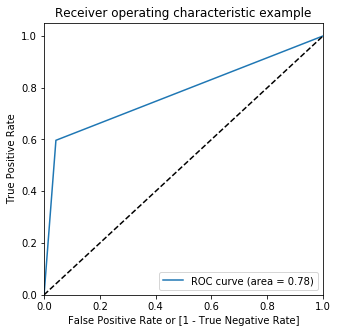

In [66]:
# Let us draw the ROC curve and find the AUC on test dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_prediction_test, drop_intermediate = False )
draw_roc(y_test, rf_prediction_test)

Per the above diagram, for Random Forest model with default parameters, we can see that the AUC is 78% on the test dataset

#### Apply Hyperparameter tuning

######  i) Tuning max_depth

In [67]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
params = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, params, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE['churn'].values)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [68]:
# scores of GridSearch CV

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.235442,0.007010,0.008186,0.001161,2,{'max_depth': 2},0.820115,0.829885,0.812069,0.825000,...,0.824444,0.007956,4,0.833393,0.829801,0.818809,0.823838,0.835273,0.828223,0.006112
1,0.598669,0.005068,0.010773,0.000416,7,{'max_depth': 7},0.881178,0.910057,0.912356,0.908621,...,0.904908,0.011950,3,0.926324,0.911991,0.911668,0.913212,0.908333,0.914306,0.006223
2,0.882342,0.010866,0.012949,0.000630,12,{'max_depth': 12},0.914224,0.945977,0.952443,0.946695,...,0.941836,0.013999,2,0.971837,0.969287,0.971550,0.967311,0.969145,0.969826,0.001679
3,1.038292,0.010771,0.014786,0.000377,17,{'max_depth': 17},0.918822,0.957615,0.962500,0.955603,...,0.950572,0.016034,1,0.988182,0.988505,0.987319,0.987355,0.987284,0.987729,0.000512


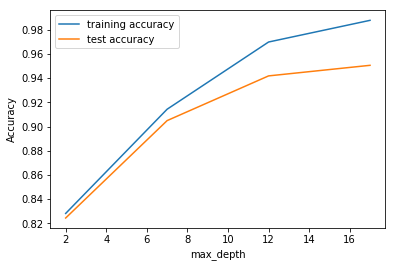

In [69]:
# plotting accuracies with max_depth

plt.figure()

plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

According to the above plot a max depth of 7 seems to be optimal

######  ii) Tuning min_samples_leaf

- Let's now check the optimum value for min samples leaf in our case.

In [70]:
# GridSearchCV to find optimal min samples leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
params = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, params, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE['churn'].values)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [71]:
# scores of GridSearch CV

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.697888,0.007085,0.011376,0.000470,100,{'min_samples_leaf': 100},0.874282,0.903448,0.898851,0.894971,...,0.893730,0.010117,1,0.911955,0.901394,0.896652,0.898664,0.897019,0.901137,0.005662
1,0.652156,0.007075,0.011384,0.000791,150,{'min_samples_leaf': 150},0.865661,0.896121,0.896983,0.890805,...,0.888643,0.011691,2,0.904303,0.892844,0.892162,0.895359,0.889476,0.894829,0.005094
2,0.603386,0.010286,0.011250,0.001078,200,{'min_samples_leaf': 200},0.859339,0.886494,0.893103,0.881897,...,0.882033,0.011924,3,0.895970,0.880703,0.888390,0.885516,0.883764,0.886869,0.005189
3,0.568099,0.007404,0.010969,0.000640,250,{'min_samples_leaf': 250},0.857471,0.887500,0.882040,0.888218,...,0.880137,0.011534,4,0.888354,0.882283,0.883073,0.882571,0.877766,0.882809,0.003364
4,0.540991,0.007773,0.009972,0.000632,300,{'min_samples_leaf': 300},0.856178,0.885489,0.882902,0.881322,...,0.878441,0.011274,5,0.884474,0.883469,0.881385,0.879122,0.878305,0.881351,0.002387


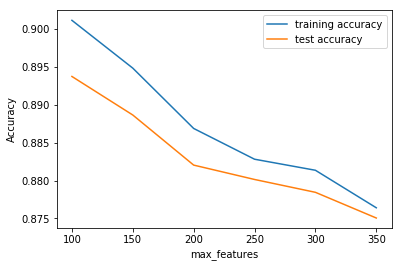

In [72]:
# plotting accuracies with min samples leaf

plt.figure()

plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

We can see that the model starts of overfit as we decrease the value of min_samples_leaf. 

######  iii) Tuning min_samples_split

- Let's now look at the performance of the ensemble as we vary min_samples_split.

In [73]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
params = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, params, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE['churn'].values)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [74]:
# scores of GridSearch CV

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.015167,0.018536,0.013358,0.000801,200,{'min_samples_split': 200},0.884339,0.922126,0.920259,0.916523,...,0.913357,0.014699,1,0.926719,0.923055,0.919139,0.918744,0.921947,0.921921,0.002903
1,0.977663,0.011270,0.012374,0.000496,250,{'min_samples_split': 250},0.875718,0.914368,0.915517,0.906322,...,0.905454,0.015255,2,0.921151,0.916804,0.915152,0.912745,0.913649,0.915900,0.002965
2,0.960007,0.021995,0.013970,0.001546,300,{'min_samples_split': 300},0.873994,0.911063,0.911207,0.909626,...,0.904449,0.015398,3,0.914362,0.909045,0.910051,0.913535,0.911207,0.911640,0.002022
3,0.925852,0.022490,0.012263,0.000852,350,{'min_samples_split': 350},0.874425,0.907759,0.907471,0.905172,...,0.901489,0.013748,4,0.915152,0.908291,0.903729,0.908614,0.906753,0.908508,0.003745
4,0.913380,0.025935,0.011958,0.000629,400,{'min_samples_split': 400},0.872557,0.905316,0.905029,0.902155,...,0.898730,0.013245,5,0.909907,0.901789,0.904196,0.906962,0.905675,0.905706,0.002715


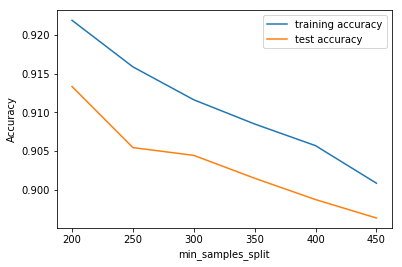

In [75]:
# plotting accuracies with min_samples_split

plt.figure()

plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

##### Grid Search to Find Optimal Hyperparameters
    - We can now find the optimal hyperparameters using GridSearchCV.

In [76]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [4,8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_SMOTE, y_train_SMOTE['churn'].values)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 10.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [77]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8961721938042416 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


**Fitting the final model with the best parameters obtained from grid search.**

In [78]:
# model with the best hyperparameters

rf_final = RandomForestClassifier(bootstrap=True, max_depth=10, min_samples_leaf=100, min_samples_split=200, max_features=10,
                                  n_estimators=100)

# fit
rf_final.fit(X_train_SMOTE, y_train_SMOTE['churn'].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
# predict

rf_final_prediction_test = rf_final.predict(X_test)

In [80]:
# print the confusion matrix and accuracy on the test data set :

rf_confusion = confusion_matrix(y_test, rf_final_prediction_test)
print('Confusion Matrix : ', '\n')
print(rf_confusion)
print('\n Random Forest (Optimal Parameters) accuracy score on Test Data : ', metrics.accuracy_score(y_test, 
                                                                                                     rf_final_prediction_test))

Confusion Matrix :  

[[6868  601]
 [ 182  515]]

 Random Forest (Optimal Parameters) accuracy score on Test Data :  0.9041146216017634


In [81]:
# Let us now check the Sensitivity, Specificity, False Positive Rate, Positive Predictive Value and Negative Predictive Values

# true positive
TP = rf_confusion[1,1]

# true negatives
TN = rf_confusion[0,0] 

# false positives
FP = rf_confusion[0,1] 

# false negatives
FN = rf_confusion[1,0] 

print('Sensitivity : ',TP / float(TP+FN))
print('Specificity : ',TN / float(TN+FP))
print('False Positive Rate : ', FP/ float(TN+FP)) # predicting churn when user has not churned
print ('Positive Predictive Value : ', TP / float(TP+FP))
print ('Negative Predictive Value : ',TN / float(TN+FN))

Sensitivity :  0.7388809182209469
Specificity :  0.9195340741732494
False Positive Rate :  0.08046592582675056
Positive Predictive Value :  0.4614695340501792
Negative Predictive Value :  0.9741843971631206


In [82]:
# class-wise accuracy - Random Forest with optimal parameters - on test data

class_wise = metrics.classification_report(y_true=y_test, y_pred=rf_final_prediction_test)
print(class_wise)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7469
           1       0.46      0.74      0.57       697

    accuracy                           0.90      8166
   macro avg       0.72      0.83      0.76      8166
weighted avg       0.93      0.90      0.91      8166



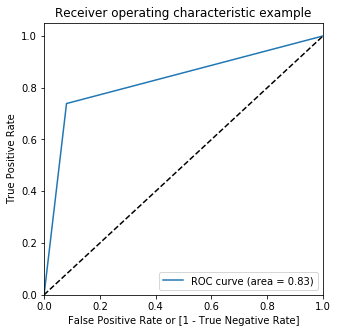

In [83]:
# Let us draw the ROC curve and find the AUC on test dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_final_prediction_test, drop_intermediate = False )
draw_roc(y_test, rf_final_prediction_test)

Per the above diagram, for Random Forest model after using optimal hyperparameter, we can see that the AUC is 83% on the test dataset

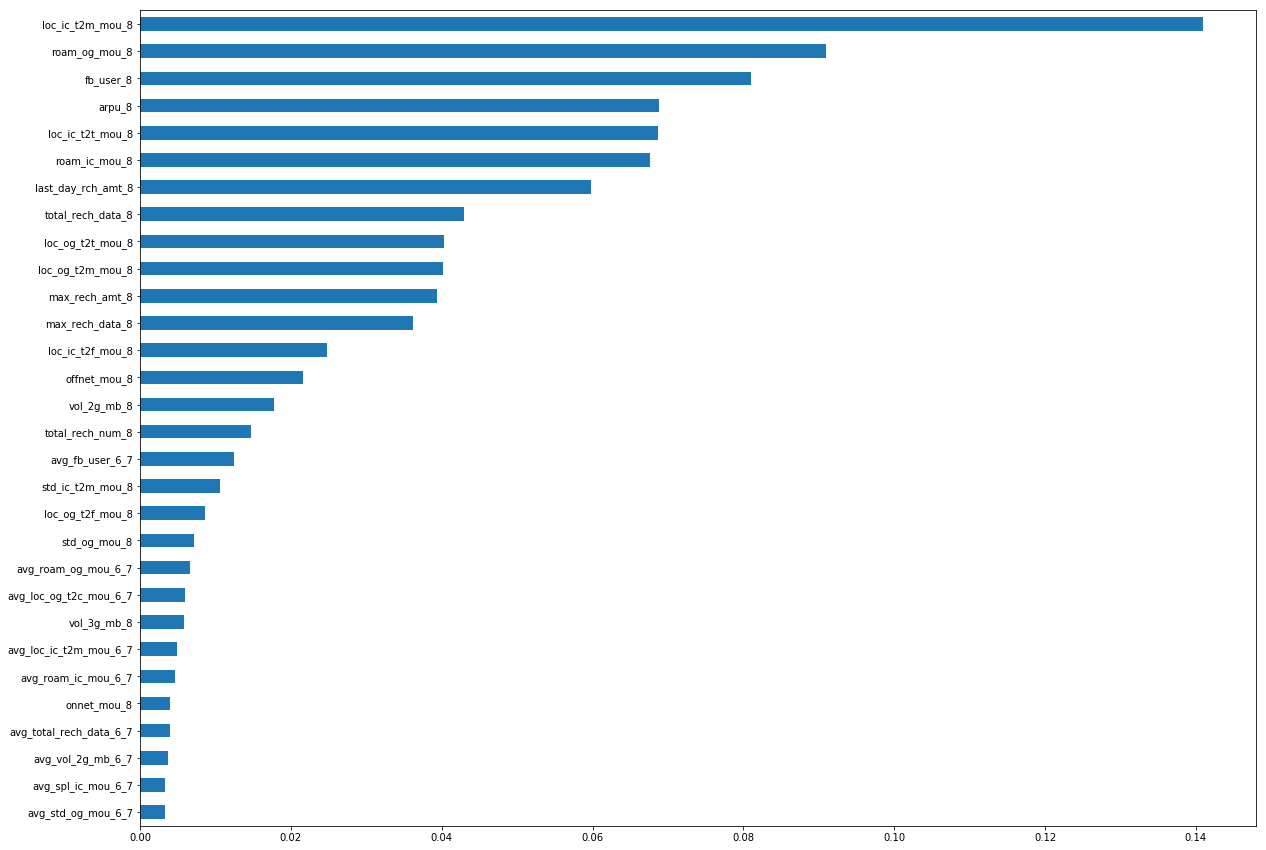

In [84]:
# Let us get the top 30 features that are of utmost importance to avoid churning of users:

figure = plt.figure(figsize = (20,15))
importances = rf_final.feature_importances_

weights = pd.Series(importances, index=X_train_SMOTE.columns.values)
weights.sort_values()[-30:].plot(kind = 'barh')

plt.show()

###### Observations on Random Forest :

    - Model has 90% Accuracy.
    - Model Sensitivity is 74%.
    - AUC is around 83%
    - The above graph gives an insight on the top 30 features which can attribute for a user to churn  

###### Conclusion :

    - Random Forest Model is better when compared to Logistic Regression Model
    - Large number of customers in the network are below 5 years.
    - The customer churn happens mostly between between 6 months to 5 years of their tenure with the operator.
    - Major churn happens between 1-2 year tenure of the user.
    - Not many of high value customers opt for churn which is a good service indicator for the operator.
    - Maximum Recharge amount during the August month indicate more probability of customer churn. Hence the operator should
      look out for providing discounts for users whose usage is more.
    - The local calls to other mobile (both incoming and outgoing), average revenue per user, roaming charges 
      (both for incoming and outging), recharge amount for both calls and data are some of the parameters where the telecom
      company needs to look into to avoid churn of users